In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#importing the dataset
df  = pd.read_csv("uber.csv")

In [9]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [11]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [15]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)


In [17]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column
df = df.drop('pickup_datetime',axis=1)

df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [18]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

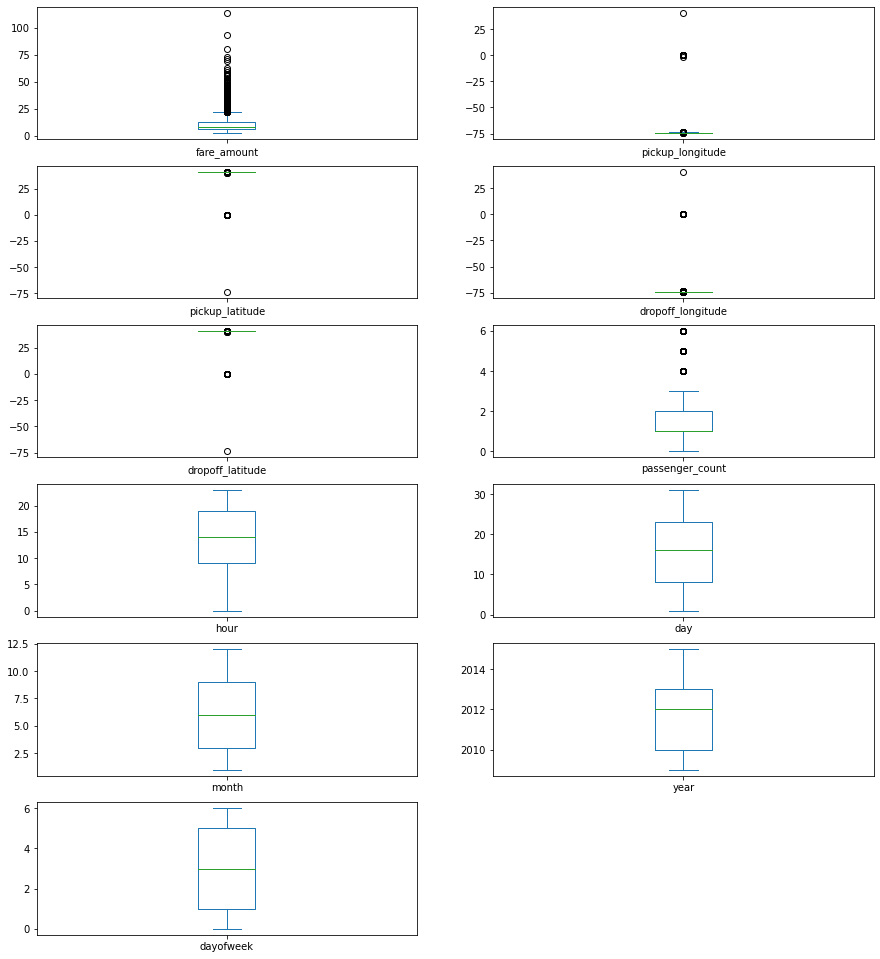

In [19]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [20]:

#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

In [21]:
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

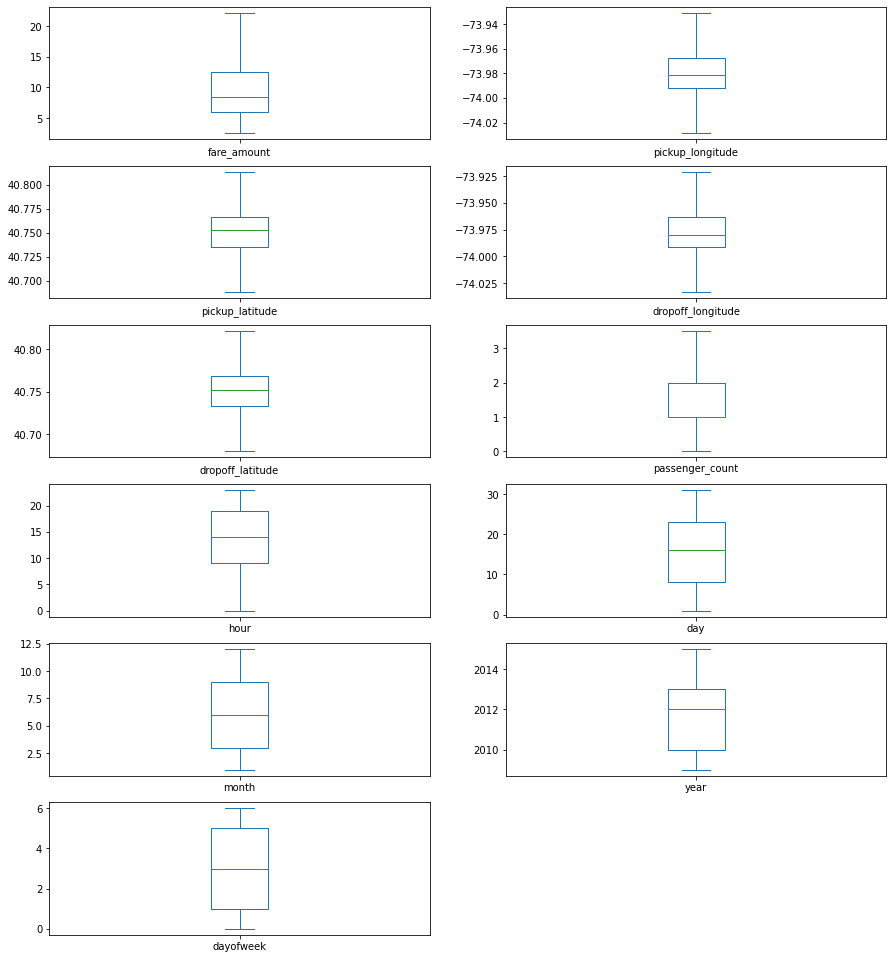

In [22]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [24]:
!pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()


[1.683325209043763, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.041290183699302, 0.0, 9.557899066628137, 1.1717748706113873, 2.332714231417754, 4.889423641655177, 2.2508615798052785, 1.1717748706113873, 0.3022521108558365, 3.5812557740132496, 1.3099517093907531, 1.7162797922772641, 0.7299665570466272, 2.515953547298386, 1.7903227398506378, 1.0347050399795192, 2.4902472008686214, 0.9594707625837083, 1.2613897673438557, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.429517296441016, 2.233699311545987, 10.831371590181742, 1.8950491608266506, 1.9049353402366132, 3.1821178242889583, 4.340875296978145, 2.9230236888626995, 1.200213842045202, 2.635790807403461, 2.253613903554444, 9.238796115978548, 4.826533532872274, 1.2502926870845612, 0.7984742276744765, 0.8403961526827606, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.734650269228348, 0.0, 4.504360509010462, 1.5579008497313822, 4.923160610490316, 7.683158068

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.930791,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.041290


In [25]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)


Remaining observastions in the dataset: (3856, 12)


In [27]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)]


In [28]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [29]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.930791,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.041290


In [30]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<AxesSubplot:>

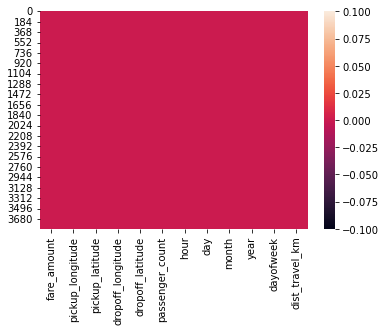

In [31]:
sns.heatmap(df.isnull()) #Free for null values


In [32]:
corr = df.corr() #Function to find the correlation

In [33]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.142253,-0.097015,0.221274,-0.130415,-0.014266,0.005591,-0.008713,0.040135,0.148824,0.035902,0.791918
pickup_longitude,0.142253,1.000000,0.275047,0.426378,0.094488,-0.023683,0.013273,-0.020311,0.003436,0.017293,-0.018727,0.046030
pickup_latitude,-0.097015,0.275047,1.000000,0.049562,0.536243,-0.013157,0.014375,-0.005907,0.013698,-0.006335,-0.032621,-0.066920
dropoff_longitude,0.221274,0.426378,0.049562,1.000000,0.248420,-0.017553,-0.058123,-0.010862,0.025976,0.024802,-0.016847,0.169231
dropoff_latitude,-0.130415,0.094488,0.536243,0.248420,1.000000,-0.021876,-0.015575,0.008189,-0.007409,0.015807,-0.028910,-0.084377
passenger_count,-0.014266,-0.023683,-0.013157,-0.017553,-0.021876,1.000000,0.034129,0.034438,0.022939,-0.019081,0.021547,-0.006244
hour,0.005591,0.013273,0.014375,-0.058123,-0.015575,0.034129,1.000000,0.010083,0.005582,0.017997,-0.099662,-0.027884
day,-0.008713,-0.020311,-0.005907,-0.010862,0.008189,0.034438,0.010083,1.000000,-0.023616,-0.007062,-0.019994,-0.012940
month,0.040135,0.003436,0.013698,0.025976,-0.007409,0.022939,0.005582,-0.023616,1.000000,-0.118590,0.005145,0.016721
year,0.148824,0.017293,-0.006335,0.024802,0.015807,-0.019081,0.017997,-0.007062,-0.118590,1.000000,-0.016319,0.029261


<AxesSubplot:>

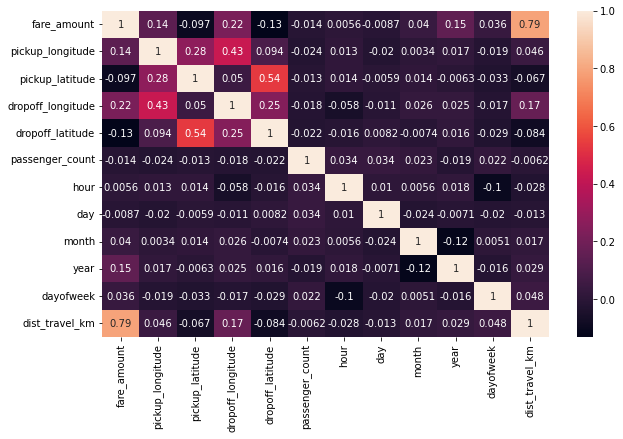

In [34]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

In [35]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

y = df['fare_amount']


In [36]:
#Dividing Dataset into Trainig and Testing Datatset


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)


In [38]:
#LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train,y_train)

regression.intercept_ #To find the linear intercept

regression.coef_ #To find the linear coeeficient

prediction = regression.predict(X_test) #To predict the target values

print(prediction)



[ 9.43973635 15.87363707 24.66750395 ... 19.22105353  5.70673172
  7.04268106]


In [39]:
y_test

112      6.50
3258    14.10
3691    22.25
1318    15.70
747     22.25
        ...  
3727     4.90
718     13.50
1744    16.10
3317     7.00
2268     4.00
Name: fare_amount, Length: 1273, dtype: float64

In [40]:
#METRICS EVALUATION USING RMS AND R2

from sklearn.metrics import r2_score 

r2_score(y_test,prediction)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,prediction)

MSE 

9.273933064753818

In [41]:
RMSE = np.sqrt(MSE)

RMSE

3.0453132950082193

In [42]:
#RANDOM FOREST REGRESSION

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

y_pred

#METRICS EVALUATION FOR RANDOM FOREST

R2_Random = r2_score(y_test,y_pred)

R2_Random

MSE_Random = mean_squared_error(y_test,y_pred)

MSE_Random

RMSE_Random = np.sqrt(MSE_Random)

RMSE_Random

2.5109516413159962